In [5]:
import pm4py
import pandas as pd
import conformance_checker as cc
import requests
import json

In [6]:
def getBotInfo(endpoint="http://localhost:8080/SBFManager"):
    """
    Fetches the first bot from the social bot manager and returns its id and name
    """
    response = requests.get(f"{endpoint}/bots")
    if response.status_code == 200:
        data = json.loads(response.content)
        if len(data) == 0:
            return None
        first_value = list(data.values())[0]
        return first_value['id'], first_value['name']
    else:
        return None

In [7]:
bot_manager_endpoint = "http://localhost:8080/SBFManager"

bot_id, bot_name = getBotInfo(bot_manager_endpoint)
print("Bot ID: ", bot_id)
print("Bot Name: ", bot_name)
event_log_generator_endpoint = "http://localhost:8087"

log,_ = cc.fetch_event_log(bot_name, event_log_generator_endpoint)
if not "head" in dir(log):
    print("Could not fetch event log")
    exit(1)
log.head()

Bot ID:  4b81a5ec1eed92fb09b653b0f2a91bd2b9b969cc10e18411e0de5f6938d32c7337bf313a988fe5b42a5f0ae3f887e9e81c1a39eadf50df0a5d3abd94d3cf7df9
Bot Name:  MensaBot
Fetching event log from http://localhost:8087/bot/MensaBot


parsing log, completed traces :: 100%|██████████| 2/2 [00:00<00:00, 2157.56it/s]
/Users/lakhoune/Desktop/Repos/mobsos-event-log-generator/.venv/lib/python3.11/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/Users/lakhoune/Desktop/Repos/mobsos-event-log-generator/.venv/lib/python3.11/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/Users/lakhoune/Desktop/Repos/mobsos-event-log-generator/.venv/lib/python3.11/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so ea

,EVENT,concept:name,time:timestamp,lifecycle:transition,RESOURCE,RESOURCE_TYPE,REMARKS,case:concept:name
0,USER_MESSAGE,greeting,2023-08-20 13:48:26+00:00,start,4b81a5ec1eed92fb09b653b0f2a91bd2b9b969cc10e184...,bot,"{""user"": ""41de37a21eb0fbd7c8f2e57360ba443ce8f4...",1fc35d62-4803-47b0-bce7-37ddb2077550
1,USER_MESSAGE,greeting,2023-08-20 13:48:26+00:00,complete,4b81a5ec1eed92fb09b653b0f2a91bd2b9b969cc10e184...,bot,"{""user"": ""41de37a21eb0fbd7c8f2e57360ba443ce8f4...",1fc35d62-4803-47b0-bce7-37ddb2077550
2,BOT_MESSAGE,greeting:response,2023-08-20 13:48:26+00:00,start,4b81a5ec1eed92fb09b653b0f2a91bd2b9b969cc10e184...,bot,"{""user"": ""41de37a21eb0fbd7c8f2e57360ba443ce8f4...",1fc35d62-4803-47b0-bce7-37ddb2077550
3,BOT_MESSAGE,greeting:response,2023-08-20 13:48:26+00:00,complete,4b81a5ec1eed92fb09b653b0f2a91bd2b9b969cc10e184...,bot,"{""user"": ""41de37a21eb0fbd7c8f2e57360ba443ce8f4...",1fc35d62-4803-47b0-bce7-37ddb2077550
4,USER_MESSAGE,help,2023-08-20 13:48:36+00:00,start,4b81a5ec1eed92fb09b653b0f2a91bd2b9b969cc10e184...,bot,"{""user"": ""41de37a21eb0fbd7c8f2e57360ba443ce8f4...",5fe485ce-2287-4792-8072-18737eaac51c


# Discovered Model

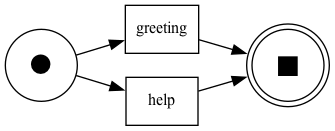

In [8]:

log['time:timestamp'] = pd.to_datetime(log['time:timestamp'])
log =log[(log['EVENT'] == 'SERVICE_REQUEST') | (log['EVENT'] == 'USER_MESSAGE')]
log = log[(log['lifecycle:transition'] == 'complete') ]

net,im,fm = pm4py.discover_petri_net_heuristics(log)
pm4py.view_petri_net(net,im,fm)

In [9]:
traces = pm4py.get_variants(log)
traces

{('greeting',): 1, ('help',): 1}

# Bot Model

Fetching bot model from http://localhost:8080/SBFManager/models/MensaBot


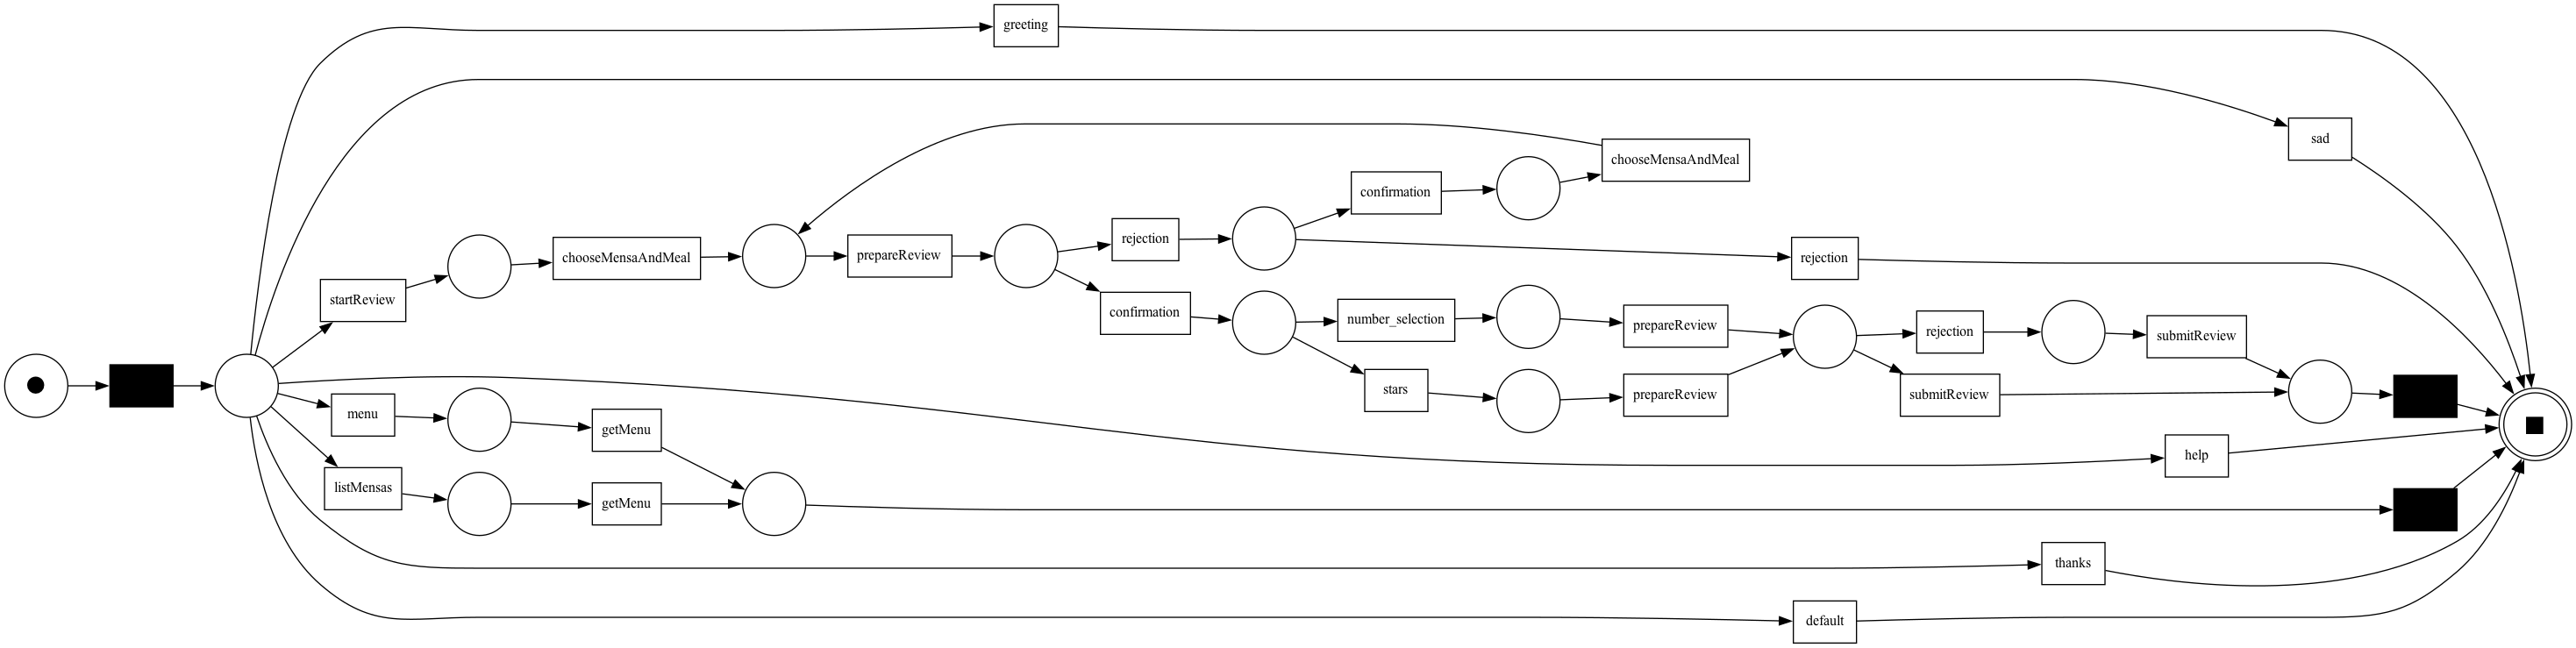

In [10]:
model = cc.fetch_bot_model(bot_name,bot_manager_endpoint)
bot_net,bot_im,bot_fm= cc.to_petri_net(model)
bot_net=pm4py.reduce_petri_net_invisibles(bot_net)
pm4py.view_petri_net(bot_net,bot_im,bot_fm)

In [11]:
# save the petri net
print(pm4py.llm.abstract_petri_net(bot_net, bot_im, bot_fm))

fitness = pm4py.fitness_token_based_replay(log,bot_net,bot_im,bot_fm)
fitness



If I have a Petri net:

places: [ 260085832f8353a7941f715b, 2737c217b4ca167946a11531, 3b995f08d360475619d5dead, 634a4745877740ed163a77fa, 7169854c636b80c0a1dd7639, 79552d31107b16eafdcb5fe3, 8631a4c087becb9236bcafbb, 9b1dbda718ab29d02cf45d48, 9df99e13096da83d093358fb, a2328d74750c839062ebabb0, b3bb240b54166af91c94ce4b, b83a85b73e0b1ed74ed0091e, d94ff20cab73cf98782a9efc, dc9d6e7a3258c325ff501abb, f8f8142fd272fb35e933c7d4, sink, source ]
transitions: [ (0d6daa47e7c34171bba39dbd_29, 'rejection'), (117e0d66e833fb189e661891_25, 'help'), (260085832f8353a7941f715b_10, 'getMenu'), (260085832f8353a7941f715b_19, 'getMenu'), (260085832f8353a7941f715b_3, None), (2737c217b4ca167946a11531_26, 'listMensas'), (2cf567110bae35efe71a5cdf_24, 'greeting'), (3b995f08d360475619d5dead_22, 'menu'), (634a4745877740ed163a77fa_12, 'rejection'), (7169854c636b80c0a1dd7639_14, 'prepareReview'), (7169854c636b80c0a1dd7639_20, 'prepareReview'), (79552d31107b16eafdcb5fe3_11, 'prepareReview'), (8631a4c087becb9236bcafbb_

replaying log with TBR, completed variants ::   0%|          | 0/2 [00:00<?, ?it/s]

replaying log with TBR, completed variants :: 100%|██████████| 2/2 [00:00<00:00, 518.14it/s]


{'perc_fit_traces': 100.0,
 'average_trace_fitness': 1.0,
 'log_fitness': 1.0,
 'percentage_of_fitting_traces': 100.0}

In [12]:
diagnostics = pm4py.conformance_diagnostics_alignments(log,net,im,fm)
# filter for fitness less than 1
unfitting = list(trace for trace in diagnostics if trace['fitness'] < 1)
fitting = list(trace for trace in diagnostics if trace['fitness']==1)
unfitting

aligning log, completed variants :: 100%|██████████| 2/2 [00:00<00:00, 1195.47it/s]


[]